# Máquina de Vetores de Suporte (SVM)

## 🧠 O que é SVM (Máquina de Vetores de Suporte)?

SVM é um **algoritmo de machine learning** usado principalmente para **classificação** (decidir a que categoria algo pertence) e também pode ser usado para **regressão** (prever valores contínuos).

Pense nele como um **separador inteligente** que tenta dividir os dados em classes de forma ótima.

## Para que serve?

**Classificação:** separar coisas em categorias, por exemplo:
- E-mails em “spam” ou “não spam”
- Tumores em “benigno” ou “maligno”

**Regressão:** prever valores, por exemplo:
- Preço de uma casa baseado em tamanho, localização, etc.

## ⚙️ Como funciona?

Imagine que você tem **dois grupos de pontos** no gráfico, cada grupo de uma cor.

A **SVM** tenta desenhar uma **linha** (ou plano, ou hiperplano) que separe os dois grupos da **melhor forma possível**.

Mas ela não só separa, ela procura a linha que **maximiza a margem** — ou seja, a distância entre a linha e os pontos mais próximos de cada grupo.  
Esses pontos mais próximos são chamados de **vetores de suporte**.

Se os dados não podem ser separados por uma linha reta, a SVM pode usar truques matemáticos chamados **kernels** para transformar os dados em um espaço onde eles possam ser separados.
 
## Ou seja: 

- A **SVM** desenha uma **linha ou limite** que separa os grupos de dados.  
- Ela escolhe a **linha que deixa a maior distância possível** entre os grupos.  
- Os pontos que ficam mais próximos da linha são chamados de **vetores de suporte** — eles “seguram” a linha.  
- Se os dados **não podem ser separados por uma linha reta**, a SVM usa uma **“mágica matemática” (kernel)** para transformar os dados e separá-los.

## 💭 O Problema

Às vezes os dados **não podem ser separados por uma linha reta (ou plano)**.  
Por exemplo: imagine pontos formando **círculos concêntricos** — não dá para desenhar uma linha reta que separe o círculo de dentro do círculo de fora.

---

## 🧩 A Solução da SVM: os *Kernels*

A **SVM transforma os dados** para um **espaço de mais dimensões**, onde eles **podem ser separados por um plano**.  
Esse novo espaço é chamado de **espaço de características** (*feature space*).

Esse “truque” é feito por funções chamadas **kernels**.

---

## ⚙️ Como Funciona o Kernel

1. Pegamos os dados originais, por exemplo em 2D: **(x, y)**  
2. Aplicamos uma **função matemática** que transforma esses dados em **3D, 4D ou mais**  
3. No novo espaço, o que era um círculo dentro de outro círculo **pode ser separado por um plano**  
4. A **SVM encontra esse plano ótimo** no espaço transformado  

💡 O kernel faz tudo isso **sem precisar calcular explicitamente** todas as dimensões extras — economizando muito processamento!

---

## 🔬 Tipos de Kernels Mais Usados

| Tipo | O que faz | Quando usar |
|------|------------|-------------|
| **Linear** | Não transforma nada (dados já separados por linha) | Dados simples |
| **Polinomial** | Cria curvas de separação | Dados com limites curvos |
| **RBF (Radial Basis Function / Gaussiano)** | Transforma em espaço infinito de dimensões | Dados muito complexos |
| **Sigmoid** | Parecido com função de rede neural | Casos específicos e experimentais |

---

## ✅ Resumo

- Dados difíceis → **kernel transforma** para um espaço de mais dimensões  
- **SVM encontra** a melhor linha/plano nesse novo espaço  
- O **kernel parece “mágico”** porque separa dados complicados sem precisar desenhar diretamente em muitas dimensões ✨



## ⚙️ Exemplo de código 

Esse código mostra como a SVM com kernel RBF consegue separar dados que não são separáveis por uma linha reta.

### 🧩 O que Acontece no codigo

- **`make_circles()`** cria pontos em formato de **círculos concêntricos** (como um alvo 🎯).  
- O **SVM linear** tenta traçar uma **linha reta**, mas **não consegue separar** os círculos.  
- O **SVM com kernel RBF** aplica a **“mágica matemática”** — ele transforma os dados em **3D internamente** e consegue **separar os círculos com uma fronteira curva perfeita**.  

---

### ⚙️ Resumo do Código

| Parte do código | O que faz |
|------------------|-----------|
| `make_circles()` | Cria dados em formato de anéis |
| `SVC(kernel='linear')` | Tenta separar com uma linha reta |
| `SVC(kernel='rbf')` | Usa kernel RBF (transforma os dados em 3D para separação curva) |
| `fit()` | Treina o modelo com os dados |
| `contourf()` | Mostra graficamente a separação das classes |


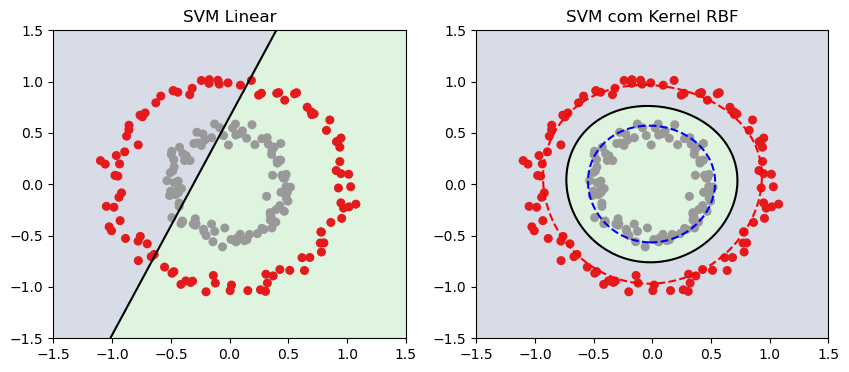

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# Gerar dados em formato de círculo (não separáveis linearmente)
X, y = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=0)

# Criar dois modelos:
# 1. SVM Linear (sem kernel não-linear)
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X, y)

# 2. SVM com kernel RBF (transforma o espaço)
clf_rbf = svm.SVC(kernel='rbf', gamma=1)
clf_rbf.fit(X, y)

# Plotar os resultados
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

titles = ['SVM Linear', 'SVM com Kernel RBF']

for i, (clf, title) in enumerate(zip([clf_linear, clf_rbf], titles)):
    ax = axes[i]
    # Criar grade de pontos para visualizar as fronteiras
    xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200),
                         np.linspace(-1.5, 1.5, 200))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Desenhar fronteira de decisão e margens
    ax.contourf(xx, yy, Z > 0, alpha=0.2)
    ax.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['red', 'black', 'blue'], linestyles=['--', '-', '--'])
    
    # Pontos do conjunto de dados
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, s=30)
    ax.set_title(title)

plt.show()


## Classificação de Margem Rígida (Hard Margin)

### 🧠 O que é isso?

É uma forma de treinar uma **Máquina de Vetores de Suporte (SVM)** quando os dados podem ser **perfeitamente separados** por uma linha (ou plano).

Ou seja:  
👉 Não existe nenhum ponto no meio da linha de separação.  
👉 Todas as amostras estão no lado certo, **sem erro**.

---

### 🧩 Como funciona

A SVM desenha uma **linha (ou plano)** que separa perfeitamente as duas classes.  
Essa linha é escolhida para **maximizar a margem**, ou seja, deixar a **maior distância possível entre os grupos e a linha**.

🔸 Nenhum ponto pode invadir essa margem — tudo precisa estar no seu lado certo.

---

### 🎯 Por que “Margem Rígida”?

Porque a SVM **não permite nenhum erro**.  
Se um ponto ficar do lado errado, o modelo **não aceita**.  
A **margem é rígida**, sem flexibilidade.

---

### 💡 Exemplo prático (imaginando um gráfico)

Pontos azuis de um lado, pontos vermelhos do outro.  
Nenhum ponto está misturado.  
A SVM traça uma linha no meio, deixando espaço (a margem) entre os dois grupos:


Azul: o o o | x x x : Vermelho
↑
linha SVM



A distância da linha até os pontos mais próximos (**vetores de suporte**) é a **margem máxima**.

---

### ⚠️ Quando usar (e quando não usar)

✅ **Use Hard Margin se:**
- Os dados são **perfeitamente separáveis**  
- **Não há ruído** nem erros de medição  

❌ **Não use se:**
- Os dados têm **ruído**
- Existem **pontos fora do lugar (outliers)**  

➡️ Nesse caso, usamos **Margem Suave (Soft Margin)**, que **permite alguns erros**.

---

### 📘 Resumo simples

| Tipo de SVM | Permite erro? | Ideal para |
|--------------|----------------|-------------|
| **Hard Margin** | ❌ Não | Dados perfeitos e bem separados |
| **Soft Margin** | ✅ Sim | Dados reais, com ruído e sobreposição |


## 🧠 Classificação de Margem Suave (Soft Margin)

É uma forma mais flexível da SVM (Máquina de Vetores de Suporte).

Ela permite que alguns pontos fiquem do lado errado da linha de separação, ou invadam a margem, quando isso ajuda o modelo a se adaptar melhor a dados reais (que quase nunca são perfeitos).

---

### 💡 Por que isso é útil?

Na vida real, os dados quase nunca são perfeitamente separáveis — sempre há:

- Ruído nas medições
- Pontos fora do padrão (outliers)
- Classes que se sobrepõem um pouco

Se usássemos uma margem rígida (Hard Margin), o modelo erraria muito com dados novos.  
A margem suave deixa o modelo mais tolerante e realista.

---

### ⚙️ Como funciona

A SVM ainda tenta achar a melhor linha que separa as classes, mas permite alguns erros pequenos, controlados por um parâmetro chamado **C**:

- **C alto** → o modelo não tolera erros (margem mais rígida)  
- **C baixo** → o modelo tolera mais erros, ficando mais generalista (margem mais suave)

---

### 🎨 Exemplo visual

#### 🧱 Hard Margin:

Azul: o o o | x x x : Vermelho
↑
linha SVM

Tudo separadinho, sem erro.

### ☁️ Soft Margin:

Azul: o o o o
x x x x
↑
linha SVM

Um ou outro ponto invade o espaço da outra classe, mas o modelo ainda separa bem no geral.

---

## 📘 Resumo simples

| Tipo        | Permite erro? | Quando usar                      | Parâmetro principal |
|------------|---------------|---------------------------------|-------------------|
| Hard Margin | ❌ Não        | Dados perfeitos, sem ruído       | —                 |
| Soft Margin | ✅ Sim        | Dados reais, com ruído ou sobreposição | C (controle de tolerância) |

---

## 👉 Em resumo

A SVM de Margem Suave tenta equilibrar acerto e flexibilidade, aceitando pequenos erros para ter um modelo mais inteligente e menos rígido com dados do mundo real.



## ⚙️ Código de exemplo

### Visualizando o efeito do parâmetro C no LinearSVC

Vamos fazer um exemplo visual mostrando como o parâmetro **C** do `LinearSVC` afeta a margem — ou seja, como a SVM muda de mais rígida (Hard Margin) para mais suave (Soft Margin).

---

# 🧩 O que acontece com C

| Valor de C      | Efeito na margem                        | Explicação simples                                           |
|-----------------|----------------------------------------|-------------------------------------------------------------|
| Pequeno (0.01)  | Margem larga, mais pontos podem estar do lado errado | SVM perdoa mais erros, modelo mais flexível                |
| Médio (1.0)     | Margem equilibrada                      | Bom compromisso entre acerto e flexibilidade               |
| Alto (100)      | Margem estreita, quase nenhum erro permitido | SVM não tolera erros, modelo mais rígido (Hard Margin aproximado) |

---

## 💡 Resumo visual

- **C pequeno** → margem larga, alguns pontos invadem a margem → modelo mais “suave”  
- **C grande** → margem estreita, todos os pontos corretos → modelo mais “rígido”


### 🧠 Exemplo: Visualizando Soft Margin com LinearSVC


/opt/conda/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


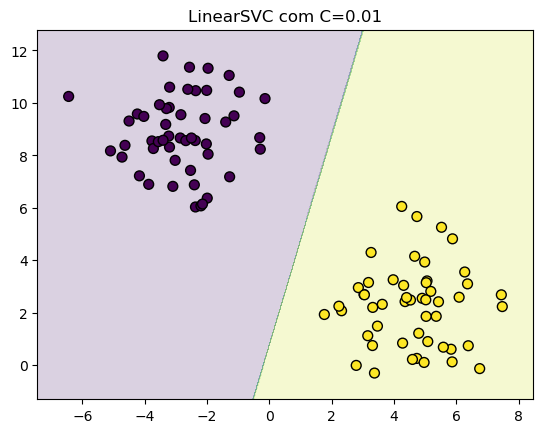

/opt/conda/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


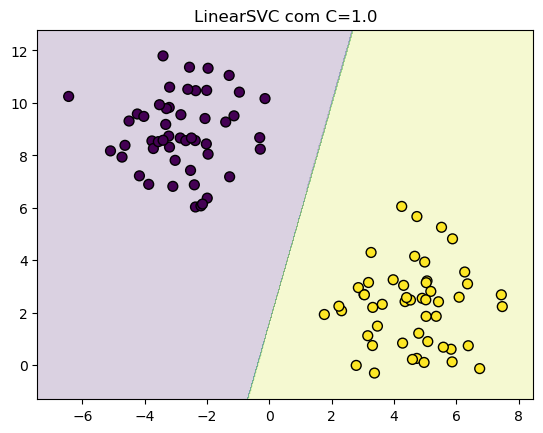

/opt/conda/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


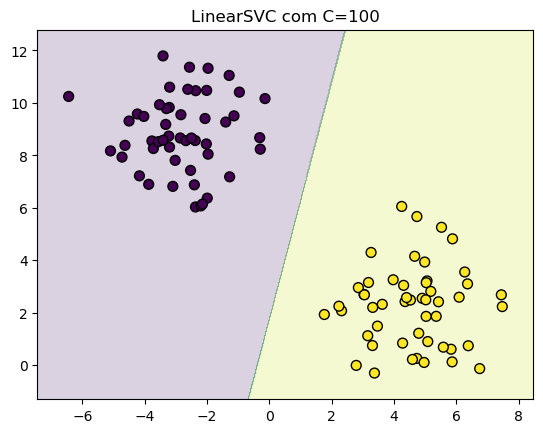

In [3]:
# 1. Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import LinearSVC

# 2. Criar dados artificiais (2 classes, 2 características)
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.5)

# 3. Função para plotar a SVM Linear
def plot_linear_svc_C(X, y, C):
    model = LinearSVC(C=C, max_iter=10000)
    model.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    plt.title(f"LinearSVC com C={C}")
    plt.show()

# 4. Testar diferentes valores de C
plot_linear_svc_C(X, y, C=0.01)  # margem muito suave, aceita muitos erros
plot_linear_svc_C(X, y, C=1.0)   # equilíbrio
plot_linear_svc_C(X, y, C=100)   # margem rígida, quase sem erros


## 🧩 Diferenças principais entre LinearSVC e SVC(kernel='linear')

| Característica       | SVC(kernel='linear')                    | LinearSVC()                                  |
|----------------------|----------------------------------------|---------------------------------------------|
| **Kernel**           | Usa SVM padrão com kernel linear        | Implementação otimizada apenas para linear  |
| **Vetores de suporte**| Disponível (`model.support_vectors_`)  | Não armazena vetores de suporte diretamente|
| **Escalabilidade**   | Bom para datasets pequenos              | Mais rápido e eficiente em datasets grandes|
| **Parâmetro C**      | Controla a margem suave                 | Mesma função: controla tolerância a erros  |


## ⚙️ Principais parâmetros do LinearSVC

### 1. C
- **O que faz:** Controla a tolerância a erros (Soft Margin).  
- **Como funciona:**
  - C pequeno → aceita mais erros → margem mais larga → modelo mais flexível  
  - C grande → aceita poucos erros → margem estreita → modelo mais rígido  
- **Exemplo:** `LinearSVC(C=1.0)`

### 2. max_iter
- **O que faz:** Número máximo de iterações para o algoritmo de otimização.  
- **Por que é importante:** Evita que o algoritmo pare antes de convergir em dados grandes ou difíceis.  
- **Exemplo:** `LinearSVC(max_iter=10000)`

### 3. dual
- **O que faz:** Decide qual formulação matemática usar para resolver o SVM.  
- **Como funciona:**
  - `dual=True` → bom quando `n_features > n_samples`  
  - `dual=False` → bom quando `n_samples > n_features` (mais comum)  
- **Exemplo:** `LinearSVC(dual=False)`

### 4. loss
- **O que faz:** Define o tipo de função de perda (como o modelo penaliza erros).  
- **Opções:**
  - `'hinge'` → perda padrão do SVM clássico  
  - `'squared_hinge'` → versão quadrática, funciona melhor para classificação linear  
- **Exemplo:** `LinearSVC(loss='squared_hinge')`

### 5. penalty
- **O que faz:** Define o tipo de regularização (evita overfitting).  
- **Opções:**
  - `'l2'` → padrão, mantém os pesos pequenos  
  - `'l1'` → gera pesos esparsos (alguns zero)  
- **Exemplo:** `LinearSVC(penalty='l2')`

### 6. multi_class
- **O que faz:** Controla como lidar com mais de duas classes.  
- **Opções:**
  - `'ovr'` → one-vs-rest (um contra todos), padrão  
  - `'crammer_singer'` → método alternativo para múltiplas classes  
- **Exemplo:** `LinearSVC(multi_class='ovr')`

### 7. fit_intercept
- **O que faz:** Decide se o modelo vai incluir o termo b (intercepto) na equação da linha.  
- **Exemplo:** `LinearSVC(fit_intercept=True)`

### 8. class_weight
- **O que faz:** Dá mais importância a classes desbalanceadas.  
- **Opções:**
  - `'balanced'` → ajusta automaticamente pesos  
  - ou um dicionário com pesos específicos  
- **Exemplo:** `LinearSVC(class_weight='balanced')`

### 9. random_state
- **O que faz:** Garante resultados reproduzíveis.  
- **Exemplo:** `LinearSVC(random_state=42)`

---

### 💡 Resumo rápido
| Parâmetro        | O que faz                                 |
|-----------------|------------------------------------------|
| C               | Controla margem (soft vs hard)           |
| max_iter        | Quantas vezes o modelo tenta aprender     |
| dual            | Qual fórmula matemática usar              |
| loss            | Tipo de penalidade para erros             |
| penalty         | Tipo de regularização                     |
| multi_class     | Como lidar com várias classes             |
| fit_intercept   | Se adiciona o termo b na linha           |
| class_weight    | Trata classes desbalanceadas              |
| random_state    | Garante resultados iguais ao rodar várias vezes |


## ⚙️ Principais Parâmetros do `SVC()`

| **Parâmetro**    | **Explicação simples**                                                                                                                                     | **Exemplo**                                 |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------|
| **kernel**       | Tipo de “linha” (ou curva) usada para separar os dados.                                                                                                   | `kernel='linear'`, `kernel='rbf'`, `kernel='poly'` |
| **C**            | Controla o quanto o modelo tolera erros (margem suave). <br> - Valor baixo → mais flexível, aceita erros. <br> - Valor alto → mais rígido, quer acertar tudo. | `C=1.0`                                     |
| **gamma**        | Controla a influência de cada ponto na criação da fronteira de decisão (só usado em kernels não lineares). <br> - Valor alto → pode gerar overfitting. <br> - Valor baixo → modelo mais suave. | `gamma='scale'` (padrão) ou `gamma=0.1`     |
| **degree**       | Grau do polinômio, usado apenas se `kernel='poly'`.                                                                                                       | `degree=3` (padrão)                         |
| **coef0**        | Constante que afeta a forma da curva no kernel `'poly'` ou `'sigmoid'`.                                                                                   | `coef0=0.0`                                 |
| **probability**  | Se `True`, permite calcular probabilidades em vez de só rótulos (usa `model.predict_proba()`).                                                            | `probability=True`                          |
| **shrinking**    | Otimiza a velocidade do treinamento (normalmente `True`).                                                                                                 | `shrinking=True`                            |
| **tol**          | Tolerância do erro no processo de treinamento — define quando parar.                                                                                      | `tol=0.001`                                 |
| **max_iter**     | Número máximo de iterações para o algoritmo. `-1` = sem limite.                                                                                           | `max_iter=-1`                               |
| **class_weight** | Permite dar pesos diferentes para cada classe, útil em dados desbalanceados.                                                                              | `class_weight={0:1, 1:3}`                   |
| **random_state** | Define uma semente aleatória para garantir resultados repetíveis.                                                                                         | `random_state=42`                           |
